In [119]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
plt.rcParams["figure.figsize"] = [10,5]

In [120]:
df = pd.read_csv("/Users/schlinkertc/Flatiron/projects/classification/files/new_data.csv",index_col='cik')
df.head()

,amended,audited,capitalexpenditures,cashandcashequivalents,cashcashequivalentsandshortterminvestments,cashfromfinancingactivities,cashfrominvestingactivities,cashfromoperatingactivities,cfdepreciationamortization,changeinaccountsreceivable,...,totalcurrentassets,totalcurrentliabilities,totalliabilities,totallongtermdebt,totalreceivablesnet,totalrevenue,totalshorttermdebt,totalstockholdersequity,treasurystock,usdconversionrate
cik,,,,,,,,,,,,,,,,,,,,,
66740,False,True,-1.577000e+09,2.853000e+09,3.233000e+09,-6.701000e+09,2.220000e+08,6.439000e+09,1.488000e+09,-305000000.0,...,1.370900e+10,7.244000e+09,2.670400e+10,1.341100e+10,5.020000e+09,3.276500e+10,1.211000e+09,9.796000e+09,-2.962600e+10,1.0
1800,False,True,-1.394000e+09,3.844000e+09,4.086000e+09,-1.039100e+10,-1.356000e+09,6.300000e+09,3.310000e+09,-190000000.0,...,1.463200e+10,9.012000e+09,3.664900e+10,1.935900e+10,5.182000e+09,3.057800e+10,2.070000e+08,3.052400e+10,-9.962000e+09,1.0
1551152,False,True,-6.380000e+08,7.289000e+09,8.061000e+09,-1.439600e+10,-1.006000e+09,1.342700e+10,1.765000e+09,-591000000.0,...,1.694500e+10,1.723900e+10,6.779800e+10,3.500200e+10,5.384000e+09,3.275300e+10,5.308000e+09,-8.446000e+09,-2.410800e+10,1.0
815094,False,True,-4.400400e+07,1.210210e+08,4.916980e+08,-5.577500e+07,-1.164550e+08,2.521970e+08,1.412100e+07,-22023000.0,...,6.771970e+08,1.059980e+08,1.078810e+08,NaN,9.080900e+07,7.694320e+08,NaN,9.368900e+08,-1.388520e+08,1.0
1467373,False,True,-5.990090e+08,6.126853e+09,6.130166e+09,-3.767171e+09,-1.755576e+09,6.626953e+09,8.927600e+08,NaN,...,1.545060e+10,1.106190e+10,1.538087e+10,1.624700e+07,8.095071e+09,4.321501e+10,6.411000e+06,1.440901e+10,-1.388376e+09,1.0


In [121]:
df.columns

Index(['amended', 'audited', 'capitalexpenditures', 'cashandcashequivalents',
       'cashcashequivalentsandshortterminvestments',
       'cashfromfinancingactivities', 'cashfrominvestingactivities',
       'cashfromoperatingactivities', 'cfdepreciationamortization',
       'changeinaccountsreceivable', 'changeincurrentassets',
       'changeincurrentliabilities', 'changeininventories', 'cik.1',
       'commonstock', 'companyname', 'costofrevenue', 'crosscalculated',
       'currencycode', 'dcn', 'deferredcharges', 'discontinuedoperations',
       'dividendspaid', 'ebit', 'effectofexchangerateoncash', 'entityid',
       'equityearnings', 'extraordinaryitems', 'fiscalquarter', 'fiscalyear',
       'formtype', 'goodwill', 'grossprofit', 'incomebeforetaxes',
       'intangibleassets', 'interestexpense', 'inventoriesnet',
       'investmentchangesnet', 'marketoperator', 'markettier',
       'minorityinterest', 'netchangeincash', 'netincome',
       'netincomeapplicabletocommon', 'original'

In [123]:
unwanted_columns = ['siccode','receiveddate',
                    'entityid','cik.1',
                    'companyname','dcn',
                    'currencycode','amended',
                    'audited','formtype','restated',
                   'sicdescription','usdconversionrate',
                   'taxonomyid','periodenddate', 'periodlength', 'periodlengthcode',
                   'crosscalculated','primarysymbol','primaryexchange','original',
                   'fiscalquarter','fiscalyear','marketoperator', 'markettier','preliminary']

In [124]:
df['manufacturing'] = df['siccode'].map(lambda x: 2000<x<4000)
df.drop(columns=unwanted_columns,inplace=True)

In [125]:
too_many_nan = []
for x in df.columns:
    if df[x].isna().sum()>20:
        too_many_nan.append(x)

In [126]:
df.drop(columns=too_many_nan,inplace=True)

In [127]:
df

,cashandcashequivalents,cashcashequivalentsandshortterminvestments,cashfromfinancingactivities,cashfrominvestingactivities,cashfromoperatingactivities,cfdepreciationamortization,commonstock,incomebeforetaxes,netchangeincash,netincome,netincomeapplicabletocommon,propertyplantequipmentnet,retainedearnings,totaladjustments,totalassets,totalliabilities,totalreceivablesnet,totalrevenue,totalstockholdersequity,manufacturing
cik,,,,,,,,,,,,,,,,,,,,
66740,2.853000e+09,3.233000e+09,-6.701000e+09,2.220000e+08,6.439000e+09,1.488000e+09,9.000000e+06,7.000000e+09,-2.000000e+08,5.349000e+09,5.349000e+09,8.738000e+09,4.063600e+10,1.076000e+09,3.650000e+10,2.670400e+10,5.020000e+09,3.276500e+10,9.796000e+09,True
1800,3.844000e+09,4.086000e+09,-1.039100e+10,-1.356000e+09,6.300000e+09,3.310000e+09,2.351200e+10,2.873000e+09,-5.563000e+09,2.368000e+09,2.368000e+09,7.563000e+09,2.456000e+10,3.932000e+09,6.717300e+10,3.664900e+10,5.182000e+09,3.057800e+10,3.052400e+10,True
1551152,7.289000e+09,8.061000e+09,-1.439600e+10,-1.006000e+09,1.342700e+10,1.765000e+09,1.800000e+07,5.197000e+09,-2.014000e+09,5.687000e+09,5.687000e+09,2.883000e+09,3.368000e+09,7.740000e+09,5.935200e+10,6.779800e+10,5.384000e+09,3.275300e+10,-8.446000e+09,True
815094,1.210210e+08,4.916980e+08,-5.577500e+07,-1.164550e+08,2.521970e+08,1.412100e+07,4.510000e+05,2.633600e+08,7.804600e+07,2.590160e+08,2.590160e+08,1.450050e+08,3.994730e+08,-6.819000e+06,1.054346e+09,1.078810e+08,9.080900e+07,7.694320e+08,9.368900e+08,True
1467373,6.126853e+09,6.130166e+09,-3.767171e+09,-1.755576e+09,6.626953e+09,8.927600e+08,7.200000e+04,6.251797e+09,1.065493e+09,4.779112e+09,4.779112e+09,1.391166e+09,1.042154e+10,1.780712e+09,2.978988e+10,1.538087e+10,8.095071e+09,4.321501e+10,1.440901e+10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1524472,2.960000e+08,2.960000e+08,-4.000000e+07,-6.430000e+08,5.860000e+08,2.610000e+08,2.000000e+06,5.850000e+08,-1.180000e+08,5.490000e+08,5.490000e+08,6.560000e+08,1.639000e+09,3.700000e+07,7.222000e+09,4.454000e+09,1.031000e+09,5.207000e+09,2.768000e+09,True
1041061,2.920000e+08,2.920000e+08,-2.620000e+09,3.130000e+08,1.176000e+09,1.370000e+08,0.000000e+00,1.839000e+09,-1.194000e+09,1.542000e+09,1.542000e+09,1.237000e+09,-7.592000e+09,-3.660000e+08,4.130000e+09,1.205600e+10,5.610000e+08,5.688000e+09,-7.926000e+09,False
1136869,5.428000e+08,5.428000e+08,-1.302200e+09,-4.166000e+08,1.747400e+09,1.040500e+09,3.100000e+06,-2.711000e+08,1.840000e+07,-3.792000e+08,-3.792000e+08,2.015400e+09,9.491200e+09,2.126700e+09,2.412680e+10,1.285550e+10,1.275800e+09,7.932900e+09,1.127130e+10,True


In [128]:
Mdf = df[df['manufacturing']==True]
nonMdf = df[df['manufacturing']==False]

In [129]:
df.head()

,cashandcashequivalents,cashcashequivalentsandshortterminvestments,cashfromfinancingactivities,cashfrominvestingactivities,cashfromoperatingactivities,cfdepreciationamortization,commonstock,incomebeforetaxes,netchangeincash,netincome,netincomeapplicabletocommon,propertyplantequipmentnet,retainedearnings,totaladjustments,totalassets,totalliabilities,totalreceivablesnet,totalrevenue,totalstockholdersequity,manufacturing
cik,,,,,,,,,,,,,,,,,,,,
66740,2.853000e+09,3.233000e+09,-6.701000e+09,2.220000e+08,6.439000e+09,1.488000e+09,9.000000e+06,7.000000e+09,-2.000000e+08,5.349000e+09,5.349000e+09,8.738000e+09,4.063600e+10,1.076000e+09,3.650000e+10,2.670400e+10,5.020000e+09,3.276500e+10,9.796000e+09,True
1800,3.844000e+09,4.086000e+09,-1.039100e+10,-1.356000e+09,6.300000e+09,3.310000e+09,2.351200e+10,2.873000e+09,-5.563000e+09,2.368000e+09,2.368000e+09,7.563000e+09,2.456000e+10,3.932000e+09,6.717300e+10,3.664900e+10,5.182000e+09,3.057800e+10,3.052400e+10,True
1551152,7.289000e+09,8.061000e+09,-1.439600e+10,-1.006000e+09,1.342700e+10,1.765000e+09,1.800000e+07,5.197000e+09,-2.014000e+09,5.687000e+09,5.687000e+09,2.883000e+09,3.368000e+09,7.740000e+09,5.935200e+10,6.779800e+10,5.384000e+09,3.275300e+10,-8.446000e+09,True
815094,1.210210e+08,4.916980e+08,-5.577500e+07,-1.164550e+08,2.521970e+08,1.412100e+07,4.510000e+05,2.633600e+08,7.804600e+07,2.590160e+08,2.590160e+08,1.450050e+08,3.994730e+08,-6.819000e+06,1.054346e+09,1.078810e+08,9.080900e+07,7.694320e+08,9.368900e+08,True
1467373,6.126853e+09,6.130166e+09,-3.767171e+09,-1.755576e+09,6.626953e+09,8.927600e+08,7.200000e+04,6.251797e+09,1.065493e+09,4.779112e+09,4.779112e+09,1.391166e+09,1.042154e+10,1.780712e+09,2.978988e+10,1.538087e+10,8.095071e+09,4.321501e+10,1.440901e+10,False


In [130]:
# # remove records that have column values with a z-score greater than the absolute value of 3
# from scipy import stats

# for x in df.columns:
#     try:
#         df = df[(np.abs(stats.zscore(df[x])) < 3)]
#     except:
#         continue

Target Variable
manufacturing
False    306
True     184
Name: manufacturing, dtype: int64


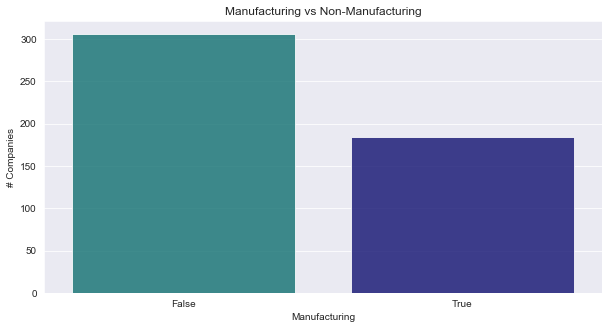

In [131]:
# Manufacturing Count
print('Target Variable')
print(df.groupby(['manufacturing']).manufacturing.count())

# Target Variable Countplot
sns.set_style('darkgrid')
plt.figure(figsize = (10,5))
sns.countplot(df['manufacturing'], alpha =.80, palette= ['teal','navy'])
plt.title('Manufacturing vs Non-Manufacturing')
plt.ylabel('# Companies')
plt.xlabel('Manufacturing')
plt.show()

In [132]:
df.columns

Index(['cashandcashequivalents', 'cashcashequivalentsandshortterminvestments',
       'cashfromfinancingactivities', 'cashfrominvestingactivities',
       'cashfromoperatingactivities', 'cfdepreciationamortization',
       'commonstock', 'incomebeforetaxes', 'netchangeincash', 'netincome',
       'netincomeapplicabletocommon', 'propertyplantequipmentnet',
       'retainedearnings', 'totaladjustments', 'totalassets',
       'totalliabilities', 'totalreceivablesnet', 'totalrevenue',
       'totalstockholdersequity', 'manufacturing'],
      dtype='object')

In [141]:
df['netincome']=np.log(df['netincome'])

In [142]:


def compare_histograms(X):
    sns.set_style('darkgrid')
    fig = plt.figure(figsize = (20,16))
    fig.subplots_adjust(hspace = .30)
    ## Financing 
    #manufacturing 
    ax1 = fig.add_subplot(221)
    ax1.hist(Mdf[X],
             alpha = .50,
             edgecolor= 'black',
             color ='teal',
             density=True)

    ax1.set_ylabel('# Companies',fontsize = 15)
    ax1.set_title(
        X,
        fontsize = 20,

    )

    #non-manufacturing
    ax2 = fig.add_subplot(222)
    ax2.hist(nonMdf[X],
             alpha = .50,
             edgecolor= 'black',
             color ='navy',
             density=True)
    plt.show()


<Figure size 1440x1152 with 0 Axes>

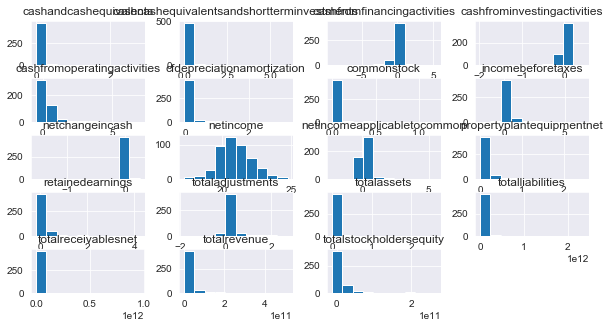

In [148]:
sns.set_style('darkgrid')
fig = plt.figure(figsize = (20,16))
fig.subplots_adjust(hspace = .30)
df.drop(columns=['manufacturing']).hist()
plt.show()

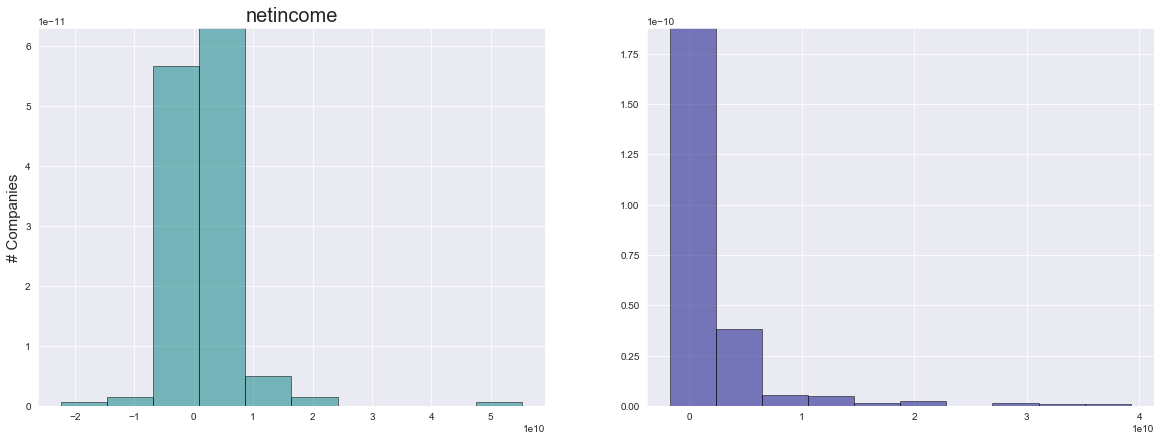

In [143]:
compare_histograms('netincome')

In [157]:
df.head()

,Income/OperationsCash,Income/FinancingCash,Income/Investing,Assets,LiabilitiesAndStockholdersEquity,StockholdersEquity,NetIncomeLoss,NetCashProvidedByUsedInOperatingActivities,NetCashProvidedByUsedInFinancingActivities,NetCashProvidedByUsedInInvestingActivities,debt_ratio,manufacturing
cik,,,,,,,,,,,,
1800,5.263911,1.627736,-4.241980,5.672100e+10,6.445800e+10,2.571750e+10,7.433636e+08,3.913000e+09,1.210000e+09,-3.153333e+09,0.683001,False
1800,7.219285,-2.167270,-5.374830,6.500100e+10,7.171150e+10,3.071050e+10,6.959600e+08,5.024333e+09,-1.508333e+09,-3.740667e+09,0.630775,False
1961,-1.955330,0.948643,3.989816,2.015174e+06,2.015174e+06,-3.441431e+06,6.289942e+05,-1.229892e+06,5.966910e+05,2.509572e+06,2.707759,False
2034,-1.136919,-1.162120,1.879211,9.109045e+08,9.109045e+08,2.634488e+08,-5.224764e+07,5.940133e+07,6.071800e+07,-9.818433e+07,0.710783,False
2098,3.450583,4.135294,-5.854293,1.033979e+08,1.033979e+08,4.641397e+07,1.980548e+06,6.834044e+06,8.190148e+06,-1.159471e+07,0.551113,True


In [170]:
pd.options.display.float_format = '${:,.1f}'.format
print('Manufacturing')
display(df[df['manufacturing']==True][['NetIncomeLoss','Assets']].describe()[1:].transpose())

Manufacturing


,mean,std,min,25%,50%,75%,max
NetIncomeLoss,"$89,918,590.0","$802,759,035.2","$-5,342,937,500.0","$-6,835,736.8","$115,972.0","$26,121,666.7","$23,768,272,727.3"
Assets,"$3,999,745,592.9","$19,491,542,236.4",$41.7,"$18,912,500.0","$210,171,333.3","$1,636,626,000.0","$371,481,400,000.0"


In [169]:
print('Non-Manufacturing')
display(df[df['manufacturing']==False][['NetIncomeLoss','Assets']].describe()[1:].transpose())

Non-Manufacturing


,mean,std,min,25%,50%,75%,max
NetIncomeLoss,"$128,165,328.7","$985,939,985.2","$-6,056,800,000.0","$-6,566,131.2","$785,483.7","$35,678,000.0","$27,216,000,000.0"
Assets,"$10,266,527,049.0","$87,874,765,767.4","$-427,802,125.0","$37,157,698.9","$471,254,900.0","$2,896,480,500.0","$3,349,879,857,142.9"


In [221]:
def feature_summary(X,Y):
    sns.set_style('darkgrid')
    fig = plt.figure(figsize = (16,10))
    fig.subplots_adjust(hspace = .30)

    ax1 = fig.add_subplot(221)
    ax1.hist(df[df['manufacturing']==True][X], 
             label ='Manufacturing', 
             alpha = .5,
             edgecolor= 'green',
             color ='teal',
             density=True,
             range=(df[X].quantile(.20),df[X].quantile(.80)))
    ax1.hist(df[df['manufacturing'] ==False][X], 
             label ='Non-Manufacturing', 
             alpha = .50,
             edgecolor= 'black',
             color ='navy',
             density=True,
             range=(df[X].quantile(.20),df[X].quantile(.80)))

    ax2 = fig.add_subplot(223)
    ax2.hist(df[df['manufacturing'] ==True][Y], 
             label ='Manufacturing', 
             alpha = .5,
             edgecolor= 'green',
             color ='teal',
             density=True,
             range=(df[Y].quantile(.20),df[Y].quantile(.80)))
    ax2.hist(df[df['manufacturing'] ==False][Y], 
             label ='Non-Manufacturing', 
             alpha = .50,
             edgecolor= 'black',
             color ='navy',
             density=True,
             range=(df[Y].quantile(.20),df[Y].quantile(.80)))

    ax3 = fig.add_subplot(122)
    ax3.scatter(x = df[df['manufacturing']==False][X], 
                y = df[df['manufacturing']==0][Y],
                alpha = .50,
                edgecolor= 'black',  
                c = 'navy', 
                s= 75, 
                label = 'Non-Manufacturing')
    ax3.scatter(x = df[df['manufacturing']==True][X], y = df[df['manufacturing']==1][Y],
                            alpha = .50,edgecolors= 'black',  c = 'teal', s= 75, label = 'Manufacturing')

    ax1.set_title(f'{X}: Manufacturing vs Non-Manufacturing')
    ax1.set_xlabel(f'{X}')
    ax1.set_ylabel('Relative Freq')
    ax1.legend(loc = 'upper right')

    ax2.set_title(f'{Y}: Manufacturing vs Non-Manufacturing')
    ax2.set_xlabel(f'{Y}')
    ax2.set_ylabel('Relative Freq')
    ax2.legend(loc = 'upper right')

    ax3.set_xlabel(f'{X}')
    ax3.set_ylabel(f'{Y}')
    ax3.set_title(f'{X} vs {Y}')
    ax3.legend()

    plt.show()

In [225]:
df['Liabilities'] = df['LiabilitiesAndStockholdersEquity']-df['StockholdersEquity']

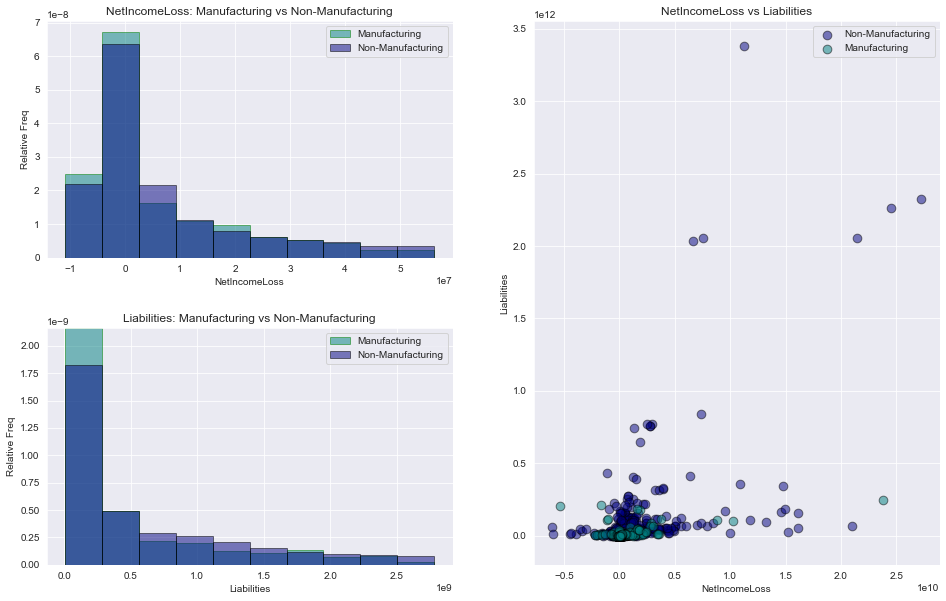

In [226]:
feature_summary('NetIncomeLoss','Liabilities')